# Importing Libs

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset
Splitting the dataset into 2 parts.

1) `df_ongoing`: representing the bizdomains that are currently using the software

2) `df_expired`: representing the bizdomains that are expired

In [2]:
df = pd.read_csv('df_final_train.csv')
mask = (df['BizIsExpired?']!='others') | (~pd.isna(df['#Activities']))
df_ongoing = df[mask]
df_expired = df[~mask]

In [3]:
print(df_expired.shape)
print(df_expired.info())
df_expired.head()

(2250, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 0 to 4149
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BizDomainId                         2250 non-null   object 
 1   no_warning_sign                     0 non-null      float64
 2   BizIsExpired?                       2250 non-null   object 
 3   BizActive?                          2250 non-null   object 
 4   AddedUsers/BoughtUser               2250 non-null   float64
 5   ActiveUsers/AddedUsers              2250 non-null   float64
 6   #Activities                         0 non-null      float64
 7   ActivitiesWoutDeal/#Activities      0 non-null      float64
 8   AvgDelayTimeActivity                17 non-null     float64
 9   #Activities/#Deals                  15 non-null     float64
 10  #Deals_file                         6 non-null      float64
 11  %NoAcquitance                   

,BizDomainId,no_warning_sign,BizIsExpired?,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,#Deals_file,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals
0,000016f3-7592-40d0-8666-1ef90f518e9a,NaN,others,others,0.066667,0.000000,NaN,NaN,NaN,NaN,NaN,without_deal,NaN,NaN,NaN,NaN
2,000fe9a8-2193-43bc-82f7-e10236ad2316,NaN,others,others,1.000000,0.238806,NaN,NaN,NaN,NaN,NaN,without_deal,6.857143,NaN,NaN,NaN
4,00324c62-b925-43a1-a944-8bdc3f97eef3,NaN,others,others,0.166667,0.000000,NaN,NaN,NaN,NaN,NaN,without_deal,NaN,NaN,NaN,NaN
5,003a5023-c29c-47d7-b484-978733878bff,NaN,others,others,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,without_deal,NaN,NaN,NaN,NaN
6,003d7420-f7c2-4780-9bff-b893620abf5a,NaN,others,others,0.500000,0.000000,NaN,NaN,NaN,NaN,NaN,without_deal,NaN,NaN,NaN,NaN


In [4]:
print(df_ongoing.info())
df_ongoing.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 1 to 4148
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BizDomainId                         1900 non-null   object 
 1   no_warning_sign                     1766 non-null   float64
 2   BizIsExpired?                       1900 non-null   object 
 3   BizActive?                          1900 non-null   object 
 4   AddedUsers/BoughtUser               1900 non-null   float64
 5   ActiveUsers/AddedUsers              1900 non-null   float64
 6   #Activities                         1822 non-null   float64
 7   ActivitiesWoutDeal/#Activities      1822 non-null   float64
 8   AvgDelayTimeActivity                1822 non-null   float64
 9   #Activities/#Deals                  1861 non-null   float64
 10  #Deals_file                         1776 non-null   float64
 11  %NoAcquitance                       1900 no

,BizDomainId,no_warning_sign,BizIsExpired?,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,#Deals_file,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals
1,0006df37-709c-4121-be9e-5210adc6a044,0.000000,1.0,0.0,0.642724,0.181397,30.0,0.866667,98.550000,1.068966,29.0,0.3103448276551724,10.777778,0.400000,0.000000,0.500000
3,002d52c3-6c10-41a5-a4b2-91422a1ab307,0.238875,0.0,1.0,0.398507,0.274307,302.0,0.662252,31.541667,0.688889,97.0,0.9175257732371134,14.000000,0.555556,0.800000,0.627451
7,00428596-e168-49ce-8428-7949cd2215ea,0.822599,0.0,0.0,1.000000,0.949580,13.0,0.000000,51.000000,1.444444,9.0,0,0.000000,0.285714,1.000000,0.846154
9,0049986f-b17d-44ef-992f-88d478dd21b8,NaN,others,others,1.000000,0.211382,1.0,1.000000,41.000000,0.000000,NaN,without_deal,NaN,NaN,NaN,NaN
10,004c3ec1-da71-494d-9adb-8a4e660f9257,0.082940,0.0,1.0,1.000000,0.804726,6059.0,0.773725,17.847273,3.579350,602.0,0.18272425249833887,1.366412,0.775748,0.434783,0.013858


In [5]:
print(f'Expired Users:\n{df_ongoing["BizIsExpired?"].value_counts()}\n')
print(f'Active Users:\n{df_ongoing["BizActive?"].value_counts()}')

Expired Users:
0.0       1605
1.0        161
others     134
Name: BizIsExpired?, dtype: int64

Active Users:
1.0       1381
0.0        385
others     134
Name: BizActive?, dtype: int64


# Feature Engineering
In this section each feature is changed in order to have a better result:
- dealing with NaN values
- changing outliers
- transforming columns into normally distributed

Although transformations for making the distribution of each column into normal was applied, none of them appeared to be normal. You can check out the kind of transformations in **Pipeline** Header and replace the columns name yourself if needed.

### no_warning_sign
- NaN values of this columns are replaced with 0

In [6]:
df_ongoing.loc[: , 'no_warning_sign'].fillna(0 , inplace=True)

### #Activities
- NaN values of this columns are replaced with 0
- Outliers are detected
- Continuous values are changed into categorical values.

In [7]:
df_ongoing['#Activities'] = df_ongoing['#Activities'].fillna(0)

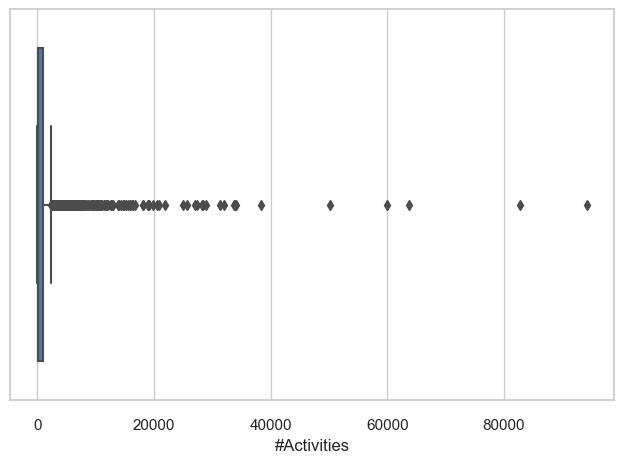

In [8]:
plt.figure()
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_ongoing['#Activities'])
# plt.savefig('10- boxplot1-#Activities')
plt.tight_layout()
plt.show()

In [9]:
Q1, median , Q3 = np.nanquantile(df_ongoing['#Activities'] , [0.25,0.5,0.75])
IQR = Q3-Q1
lower,upper = Q1-1.5*IQR , Q3+1.5*IQR
mask = (df_ongoing['#Activities']<lower) | (df_ongoing['#Activities']>upper)
df_ongoing.loc[mask , '#Activities'] = np.nan

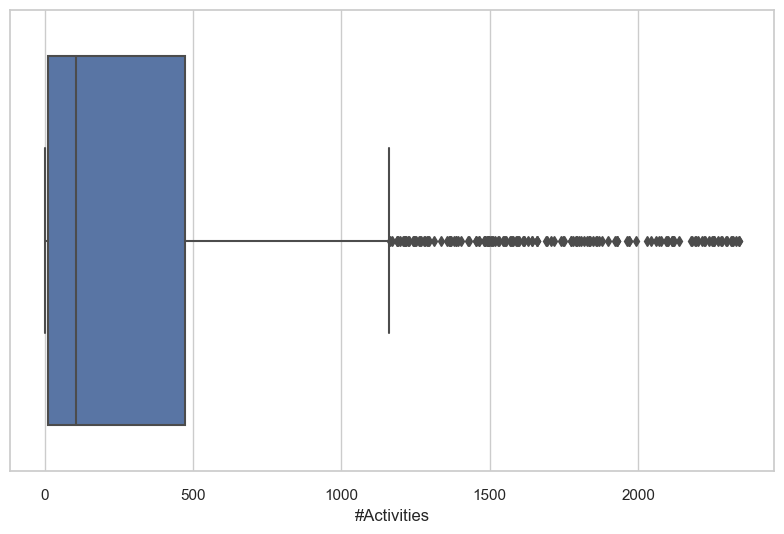

In [10]:
plt.figure()
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_ongoing['#Activities'])
# plt.savefig('11- boxplot2-#Activities')
plt.tight_layout()
plt.show()

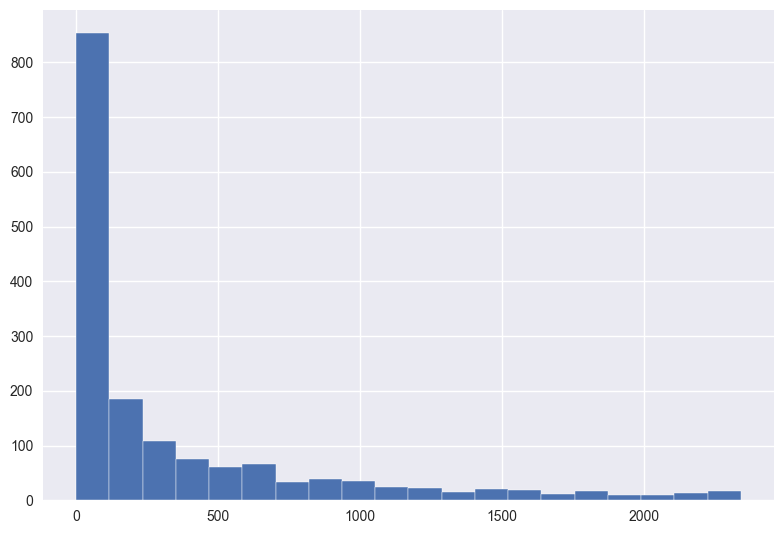

In [11]:
plt.figure()
plt.style.use('seaborn')
plt.hist(df_ongoing['#Activities'],bins=20)
# plt.savefig('12- hist-#Activities')
plt.tight_layout()
plt.show()

In [12]:
pd.DataFrame({'lb':[0 , 100,300,1000] , 'ub':[100,300,1000,'infinity'] ,'No.':[
    sum(df_ongoing['#Activities']<100), sum((100<df_ongoing['#Activities']) & (df_ongoing['#Activities']<300)),
    sum((300<df_ongoing['#Activities']) & (df_ongoing['#Activities']<1000)),sum(df_ongoing['#Activities']>1000)
], 'label':['Low' , 'Medium' , 'High','VeryHigh']})

,lb,ub,No.,label
0,0,100,803,Low
1,100,300,293,Medium
2,300,1000,342,High
3,1000,infinity,192,VeryHigh


In [13]:
df_ongoing['#Activities'] = np.where(df_ongoing['#Activities']<100 , 'Low' , np.where(df_ongoing['#Activities']<300 , 'Medium',
                                                                      np.where(df_ongoing['#Activities']<1000 , 'High' ,
                                                                               'VeryHigh')))
df_ongoing.loc[mask , '#Activities'] = 'VeryHigh'
df_ongoing.head(5)

,BizDomainId,no_warning_sign,BizIsExpired?,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,#Deals_file,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals
1,0006df37-709c-4121-be9e-5210adc6a044,0.000000,1.0,0.0,0.642724,0.181397,Low,0.866667,98.550000,1.068966,29.0,0.3103448276551724,10.777778,0.400000,0.000000,0.500000
3,002d52c3-6c10-41a5-a4b2-91422a1ab307,0.238875,0.0,1.0,0.398507,0.274307,High,0.662252,31.541667,0.688889,97.0,0.9175257732371134,14.000000,0.555556,0.800000,0.627451
7,00428596-e168-49ce-8428-7949cd2215ea,0.822599,0.0,0.0,1.000000,0.949580,Low,0.000000,51.000000,1.444444,9.0,0,0.000000,0.285714,1.000000,0.846154
9,0049986f-b17d-44ef-992f-88d478dd21b8,0.000000,others,others,1.000000,0.211382,Low,1.000000,41.000000,0.000000,NaN,without_deal,NaN,NaN,NaN,NaN
10,004c3ec1-da71-494d-9adb-8a4e660f9257,0.082940,0.0,1.0,1.000000,0.804726,VeryHigh,0.773725,17.847273,3.579350,602.0,0.18272425249833887,1.366412,0.775748,0.434783,0.013858


In [14]:
df_ongoing['#Activities'].value_counts()

Low         803
VeryHigh    459
High        343
Medium      295
Name: #Activities, dtype: int64

### ActivitiesWoutDeal/#Activities
- NaN values of this columns are replaced with mean

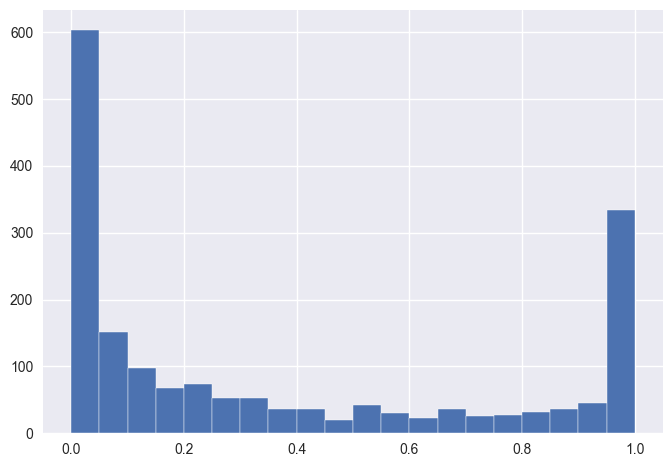

In [15]:
plt.figure()
plt.hist(df_ongoing['ActivitiesWoutDeal/#Activities'],bins=20)
plt.show()

In [16]:
df_ongoing['ActivitiesWoutDeal/#Activities'].fillna(value= np.nanmean(df_ongoing['ActivitiesWoutDeal/#Activities']),
                                                   inplace=True)

### AvgDelayTimeActivity
- Outliers are detected
- Continuous values are changed into categorical values.

In [17]:
df_ongoing['AvgDelayTimeActivity'].describe()

count     1822.000000
mean        52.975355
std        503.750041
min          0.000000
25%         15.950609
50%         33.825197
75%         55.747266
max      21464.000000
Name: AvgDelayTimeActivity, dtype: float64

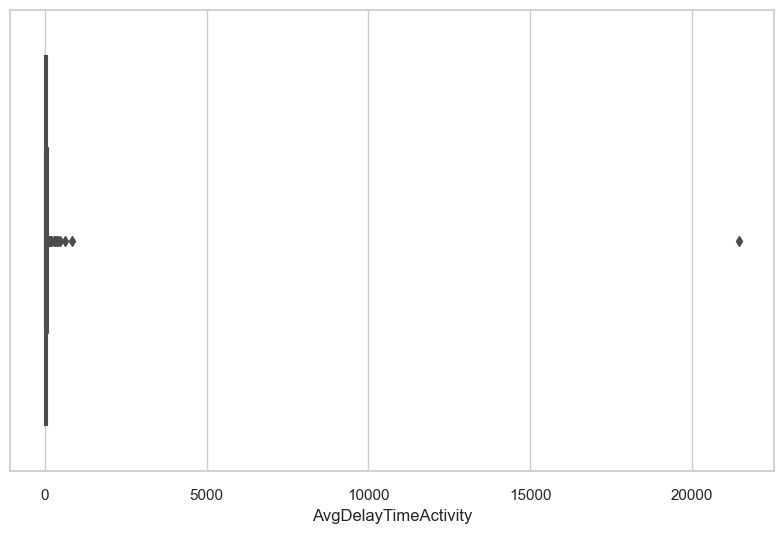

In [18]:
plt.figure()
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_ongoing['AvgDelayTimeActivity'])
# plt.savefig('14- boxplot1-AvgDelayTimeActivity')
plt.tight_layout()
plt.show()

In [19]:
Q1, median , Q3 = np.nanquantile(df_ongoing['AvgDelayTimeActivity'] , [0.25,0.5,0.75])
IQR = Q3-Q1
lower,upper = Q1-1.5*IQR , Q3+1.5*IQR
mask = df_ongoing['AvgDelayTimeActivity']>upper
df_ongoing.loc[mask ,'AvgDelayTimeActivity' ]='VeryHigh'

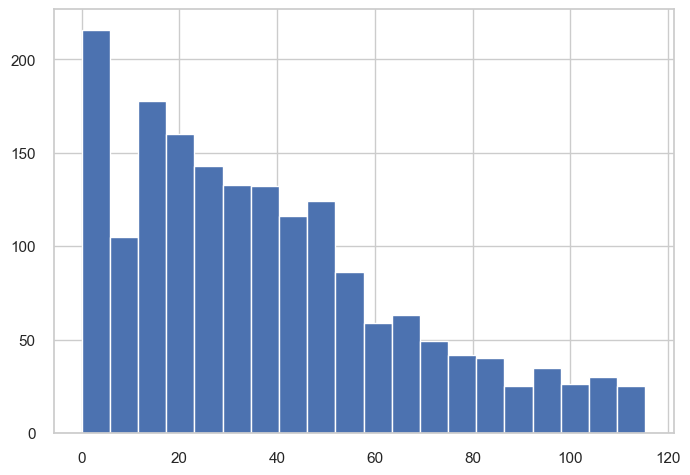

In [20]:
plt.figure()
plt.hist(df_ongoing.loc[~mask,'AvgDelayTimeActivity'],bins=20)
plt.show()

In [21]:
pd.DataFrame({'lb':[0 , 5,20,50 , upper] , 'ub':[5,20,50,upper,'infinity'] ,'No.':[
    sum(df_ongoing.loc[~mask,'AvgDelayTimeActivity']<=5), sum((5<df_ongoing.loc[~mask,'AvgDelayTimeActivity']) & (df_ongoing.loc[~mask, 'AvgDelayTimeActivity']<=20)),
    sum((20<df_ongoing.loc[~mask,'AvgDelayTimeActivity']) & (df_ongoing.loc[~mask,'AvgDelayTimeActivity']<50)),sum(df_ongoing.loc[~mask,'AvgDelayTimeActivity']>=50)
, sum(mask)], 'label':['Perfect' , 'Low' , 'Medium','High','VeryHigh']})

,lb,ub,No.,label
0,0.000000,5,207,Perfect
1,5.000000,20,358,Low
2,20.000000,50,698,Medium
3,50.000000,115.442252,524,High
4,115.442252,infinity,35,VeryHigh


In [22]:
mask = (mask) | (pd.isnull(df['AvgDelayTimeActivity']))
df_ongoing.loc[~mask,'AvgDelayTimeActivity'] = np.where(df_ongoing.loc[~mask ,'AvgDelayTimeActivity']<=5 , 'Perfect' , np.where(df_ongoing.loc[~mask ,'AvgDelayTimeActivity']<=20 , 'Low',
                                                                      np.where(df_ongoing.loc[~mask ,'AvgDelayTimeActivity']<50 , 'Medium' ,
                                                                               'High')))
df_ongoing.head(5)

,BizDomainId,no_warning_sign,BizIsExpired?,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,#Deals_file,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals
1,0006df37-709c-4121-be9e-5210adc6a044,0.000000,1.0,0.0,0.642724,0.181397,Low,0.866667,High,1.068966,29.0,0.3103448276551724,10.777778,0.400000,0.000000,0.500000
3,002d52c3-6c10-41a5-a4b2-91422a1ab307,0.238875,0.0,1.0,0.398507,0.274307,High,0.662252,Medium,0.688889,97.0,0.9175257732371134,14.000000,0.555556,0.800000,0.627451
7,00428596-e168-49ce-8428-7949cd2215ea,0.822599,0.0,0.0,1.000000,0.949580,Low,0.000000,High,1.444444,9.0,0,0.000000,0.285714,1.000000,0.846154
9,0049986f-b17d-44ef-992f-88d478dd21b8,0.000000,others,others,1.000000,0.211382,Low,1.000000,Medium,0.000000,NaN,without_deal,NaN,NaN,NaN,NaN
10,004c3ec1-da71-494d-9adb-8a4e660f9257,0.082940,0.0,1.0,1.000000,0.804726,VeryHigh,0.773725,Low,3.579350,602.0,0.18272425249833887,1.366412,0.775748,0.434783,0.013858


In [23]:
df_ongoing['AvgDelayTimeActivity'].value_counts()

Medium      698
High        524
Low         358
Perfect     207
VeryHigh     35
Name: AvgDelayTimeActivity, dtype: int64

### #Activities/#Deals
- Outliers are detected

In [24]:
df_ongoing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 1 to 4148
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BizDomainId                         1900 non-null   object 
 1   no_warning_sign                     1900 non-null   float64
 2   BizIsExpired?                       1900 non-null   object 
 3   BizActive?                          1900 non-null   object 
 4   AddedUsers/BoughtUser               1900 non-null   float64
 5   ActiveUsers/AddedUsers              1900 non-null   float64
 6   #Activities                         1900 non-null   object 
 7   ActivitiesWoutDeal/#Activities      1900 non-null   float64
 8   AvgDelayTimeActivity                1822 non-null   object 
 9   #Activities/#Deals                  1861 non-null   float64
 10  #Deals_file                         1776 non-null   float64
 11  %NoAcquitance                       1900 no

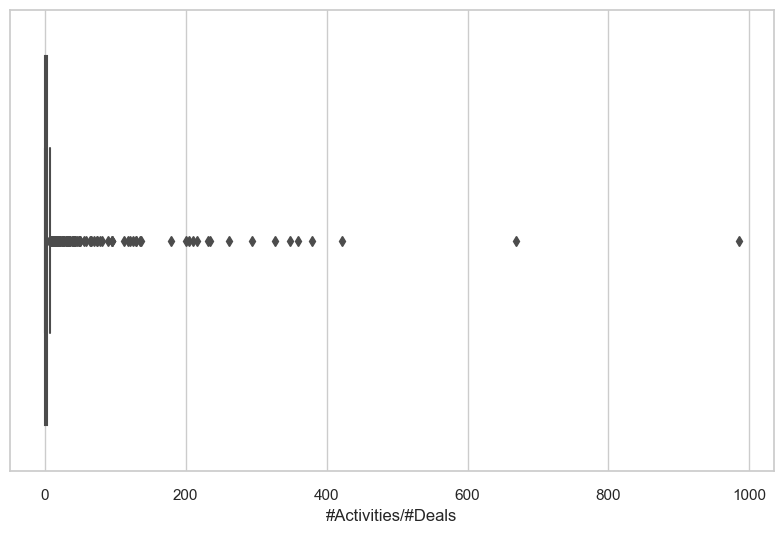

In [25]:
plt.figure()
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_ongoing['#Activities/#Deals'])
# plt.savefig('16- boxplot1-#Activities-#Deals')
plt.tight_layout()
plt.show()

In [26]:
Q1, median , Q3 = np.nanquantile(df_ongoing['#Activities/#Deals'] , [0.25,0.5,0.75])
IQR = Q3-Q1
lower,upper = Q1-1.5*IQR , Q3+1.5*IQR
mask = df_ongoing['#Activities/#Deals']>upper
df_ongoing.loc[mask ,'#Activities/#Deals' ]=max(df_ongoing.loc[~mask,'#Activities/#Deals'])
df_ongoing.loc[: ,'#Activities/#Deals' ].fillna(np.nanmean(df_ongoing.loc[: ,'#Activities/#Deals'])
                                                   , inplace=True)

### TransformationSpeed
- NaN values of this columns are replaced with mean
- Outliers are detected
- Continuous values are changed into categorical values.

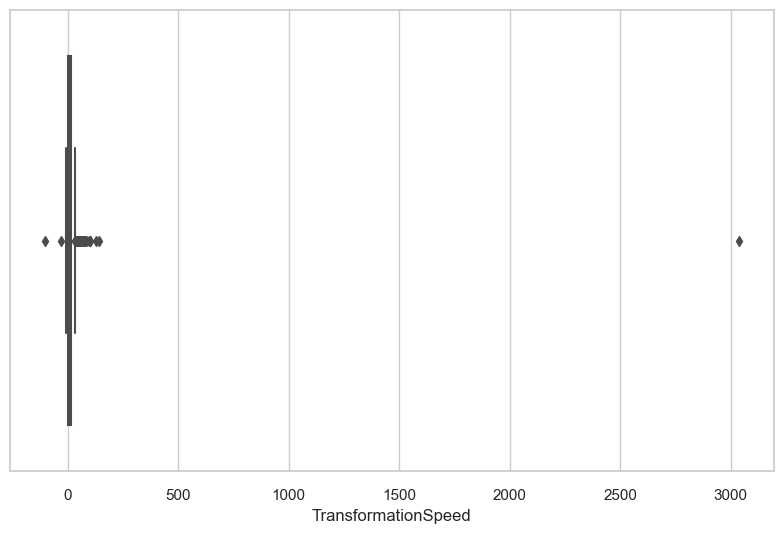

In [27]:
plt.figure()
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_ongoing['TransformationSpeed'])
# plt.savefig('17- boxplot1-TransformationSpeed')
plt.tight_layout()
plt.show()

In [28]:
mask = df_ongoing['TransformationSpeed']<0
df_ongoing.loc[mask , 'TransformationSpeed'] = np.nan

Q1, median , Q3 = np.nanquantile( df_ongoing['TransformationSpeed'] , [0.25,0.5,0.75])
IQR = Q3-Q1
lower,upper = Q1-1.5*IQR , Q3+1.5*IQR
mask = df_ongoing['TransformationSpeed']>=upper
df_ongoing.loc[mask ,'TransformationSpeed' ] = np.nan
df_ongoing.loc[mask,'TransformationSpeed'] = df_ongoing.loc[mask ,'TransformationSpeed' ].fillna(
    value=np.nanmean(df_ongoing.loc[: ,'TransformationSpeed']))
df_ongoing.loc[: ,'TransformationSpeed' ].describe()

count    1540.000000
mean        7.036950
std         7.936708
min         0.000000
25%         0.297610
50%         4.667689
75%        10.653369
max        34.333333
Name: TransformationSpeed, dtype: float64

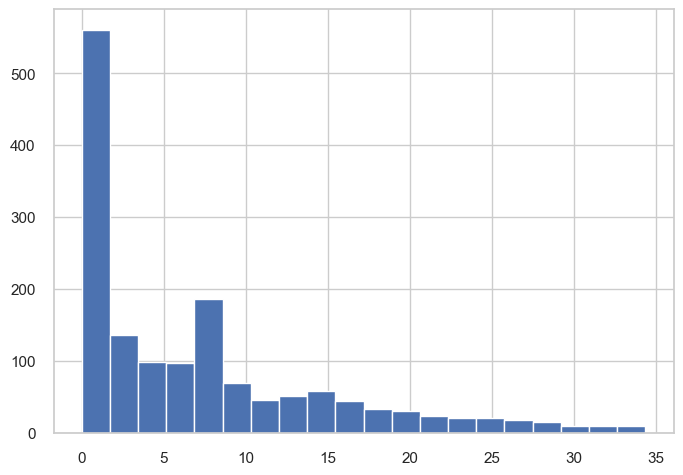

In [29]:
# df_ongoing.loc[: ,'#Activities/#Deals' ]

plt.figure()
plt.hist(df_ongoing.loc[: ,'TransformationSpeed' ],bins=20)
plt.show()

In [30]:
name= 'TransformationSpeed'
temp = pd.DataFrame({'info':['less than 1 or greater than 20','between 1 and 3, or between 10 and 20',
                     'between 3 and 10'] ,
              'No.':[sum((df_ongoing[name]<=1) | (df_ongoing[name]>=20)), 
                     sum((df_ongoing[name]<=3) | (df_ongoing[name]>=10))-sum((df_ongoing[name]<=1) | (df_ongoing[name]>=20)),
                                                              sum((df_ongoing[name]>3) & (df_ongoing[name]<10))],
                     'label':['Bad','OK','Good']
             })
mask1 = ((df_ongoing[name]<=1) | (df_ongoing[name]>=20)).astype(int)
mask2 = ((df_ongoing[name]<=3) | (df_ongoing[name]>=10)).astype(int)
mask2 = (mask2-mask1).astype(bool)
mask1 = mask1.astype(bool)
mask3 = (df_ongoing[name]>3) & (df_ongoing[name]<10)

df_ongoing.loc[mask1 , name]='Bad'
df_ongoing.loc[mask2 , name]='OK'
df_ongoing.loc[mask3 , name]='Good'
temp

,info,No.,label
0,less than 1 or greater than 20,633,Bad
1,"between 1 and 3, or between 10 and 20",444,OK
2,between 3 and 10,463,Good


### TransformationRate
- Continuous values are changed into categorical values.

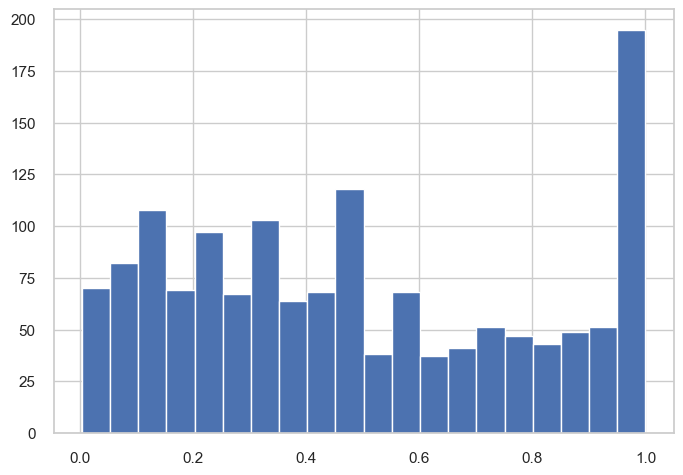

In [31]:
name = 'TransformationRate'
plt.figure()
plt.hist(df_ongoing.loc[: ,name ],bins=20)
plt.show()

In [32]:
mask1 = df_ongoing[name]<=0.3
mask2 =  (df_ongoing[name]>0.3) & (df_ongoing[name]<=0.7)
mask3 = df_ongoing[name]>0.7

df_ongoing.loc[mask1 , name] = 'Good'
df_ongoing.loc[mask2 , name] = 'OK'
df_ongoing.loc[mask3 , name] = 'Bad'

In [33]:
df_ongoing.head()

,BizDomainId,no_warning_sign,BizIsExpired?,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,#Deals_file,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals
1,0006df37-709c-4121-be9e-5210adc6a044,0.000000,1.0,0.0,0.642724,0.181397,Low,0.866667,High,1.068966,29.0,0.3103448276551724,OK,OK,0.000000,0.500000
3,002d52c3-6c10-41a5-a4b2-91422a1ab307,0.238875,0.0,1.0,0.398507,0.274307,High,0.662252,Medium,0.688889,97.0,0.9175257732371134,OK,OK,0.800000,0.627451
7,00428596-e168-49ce-8428-7949cd2215ea,0.822599,0.0,0.0,1.000000,0.949580,Low,0.000000,High,1.444444,9.0,0,Bad,Good,1.000000,0.846154
9,0049986f-b17d-44ef-992f-88d478dd21b8,0.000000,others,others,1.000000,0.211382,Low,1.000000,Medium,0.000000,NaN,without_deal,NaN,NaN,NaN,NaN
10,004c3ec1-da71-494d-9adb-8a4e660f9257,0.082940,0.0,1.0,1.000000,0.804726,VeryHigh,0.773725,Low,3.579350,602.0,0.18272425249833887,OK,Bad,0.434783,0.013858


### %NoAcquitance
- NaN values of this columns are replaced with mean

In [34]:
df_ongoing[name].info()

<class 'pandas.core.series.Series'>
Int64Index: 1900 entries, 1 to 4148
Series name: TransformationRate
Non-Null Count  Dtype 
--------------  ----- 
1466 non-null   object
dtypes: object(1)
memory usage: 94.2+ KB


In [35]:
name =  '%NoAcquitance'
mask = df_ongoing[name]=='without_deal'
df_ongoing.loc[mask , name] = np.mean((df_ongoing.loc[~mask , name]).astype(float))

### %NoReasonFailure
- Continuous values are changed into categorical values.

In [36]:
name = '%NoReasonFailure'

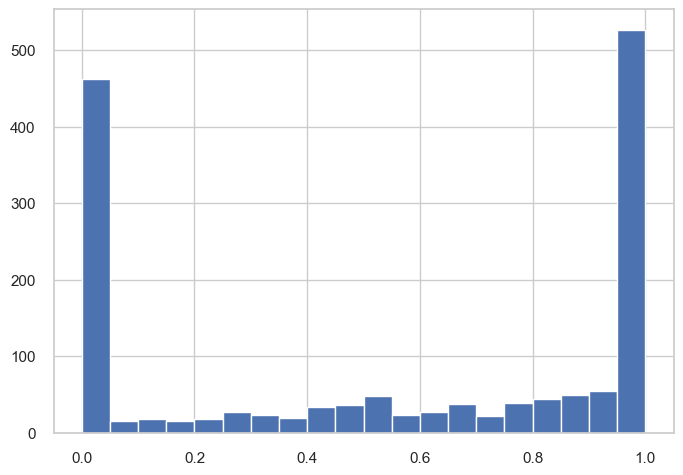

In [37]:
plt.figure()
plt.hist(df_ongoing.loc[: ,name ],bins=20)
plt.show()

In [38]:
temp = pd.DataFrame({'lb':[0,0.2,0.7] , 'ub':[0.2,0.7,1] , 'No.':[
    sum(df_ongoing[name]<=0.2), sum((df_ongoing[name]>0.2)&(df_ongoing[name]<=0.7)), sum(df_ongoing[name]>0.7)],
        'label':['Perfect' , 'Medium' , 'Bad']      
})
df_ongoing[name] = np.where(df_ongoing[name]<=0.2 , 'Perfect' ,np.where(df_ongoing[name]<=0.7 , 'Medium' , 
                                                                       np.where(df_ongoing[name]>0.7 , 'Bad' , df_ongoing[name])))
temp

,lb,ub,No.,label
0,0.0,0.2,514,Perfect
1,0.2,0.7,292,Medium
2,0.7,1.0,736,Bad


### #OngoingDeals/#Total(Correct)Deals
- NaN values of this columns are replaced with mean

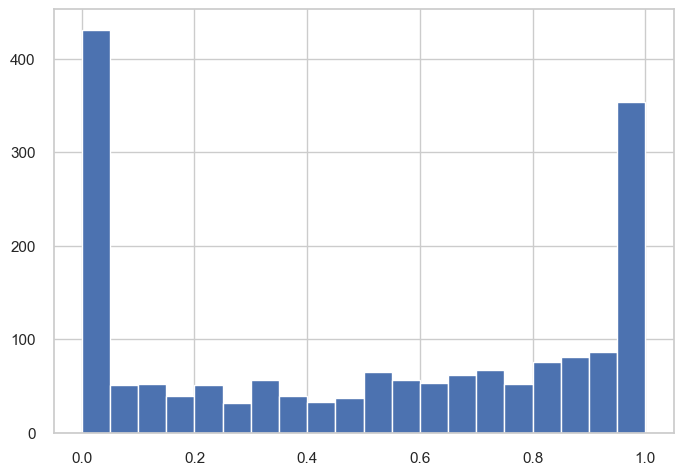

In [39]:
name = '#OngoingDeals/#Total(Correct)Deals'
plt.figure()
plt.hist(df_ongoing.loc[: ,name ],bins=20)
plt.show()

In [40]:
df_ongoing[name] = df_ongoing[name].fillna(np.nanmean(df_ongoing[name]))

# Pipeline
This pipeline is made for all the transformations that can be applied to a column in order to make it a bit more normal so training process would be done more accurately and easily.

In [41]:
# name of the column
name = 'ActivitiesWoutDeal/#Activities'

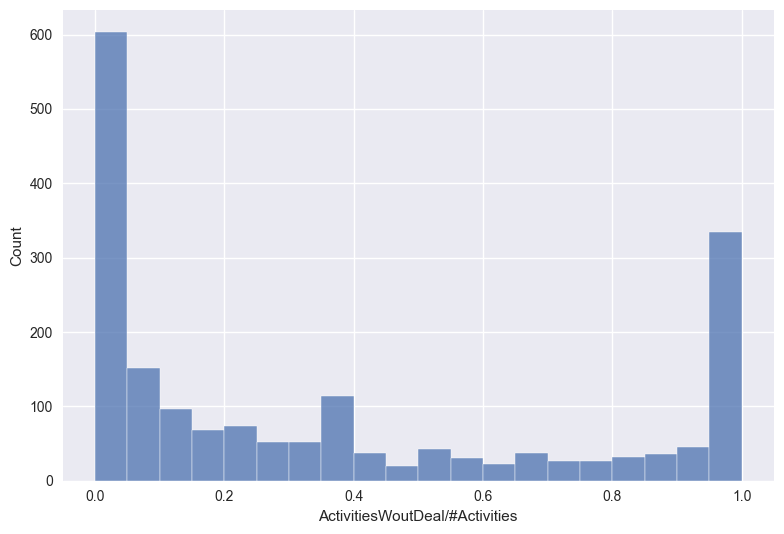

In [42]:
plt.figure()
plt.style.use('seaborn')
sns.histplot(df_ongoing[name],bins=20)
plt.tight_layout()
# plt.savefig('TransformationRate_hist' , dpi=200)
plt.show()

## Power

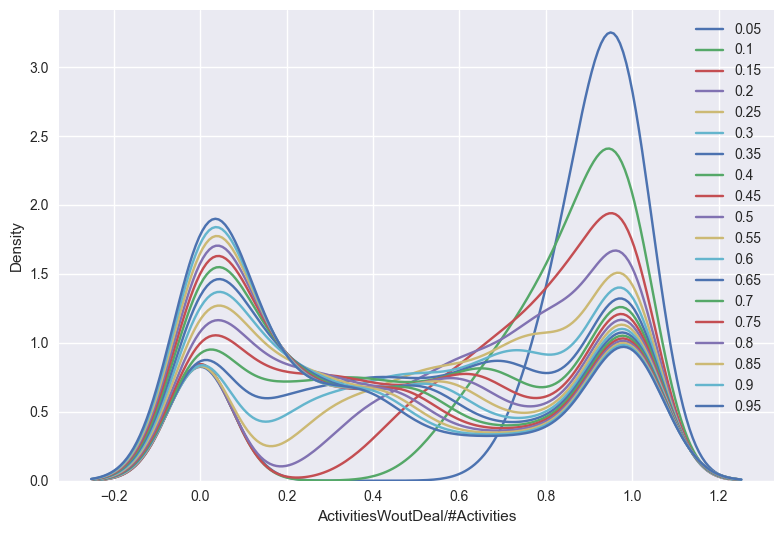

In [43]:
plt.figure()
plt.style.use('seaborn')
for i in np.around(np.arange(0.05,1,0.05),decimals=2):
    trans = df_ongoing[name]**i
    sns.kdeplot(trans,label=i)
plt.tight_layout()
plt.legend(loc=0)
# plt.savefig('no_warning_sign_power' , dpi=200)

## ln

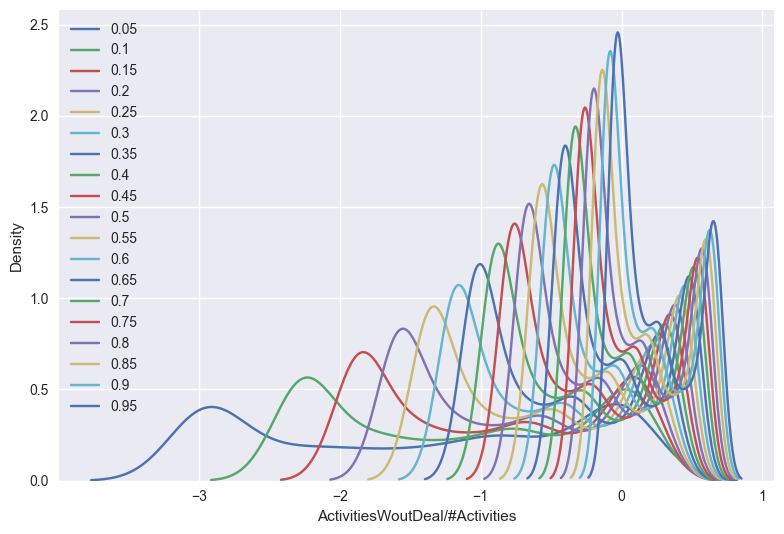

In [44]:
plt.figure()
for i in np.around(np.arange(0.05,1,0.05),decimals=2):
    trans = np.log(df_ongoing[name]+i)
    sns.kdeplot(trans,label=i)
plt.tight_layout()
plt.legend(loc=0)
# plt.savefig('3-no_warning_sign_ln' , dpi=200)

## log10

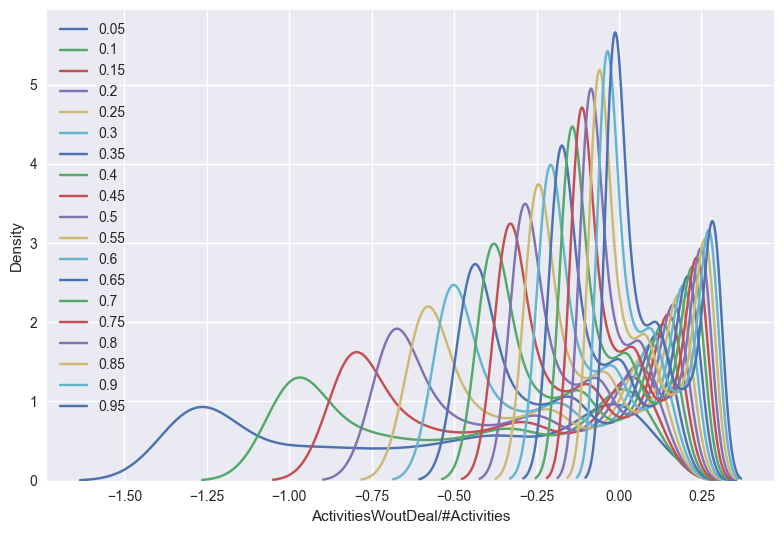

In [45]:
plt.figure()
for i in np.around(np.arange(0.05,1,0.05),decimals=2):
    trans = np.log10(df_ongoing[name]+i)
    sns.kdeplot(trans,label=i)
plt.tight_layout()
plt.legend(loc=0)
# plt.savefig('4-no_warning_sign_log10' , dpi=200)

## inverse

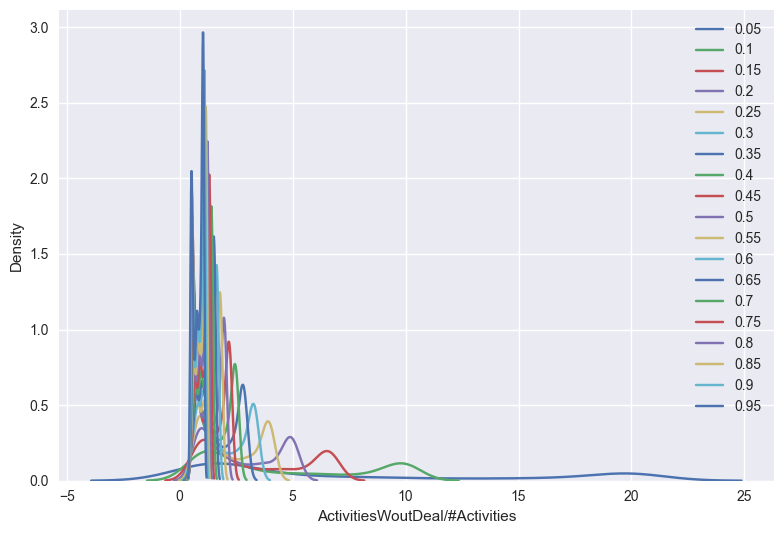

In [46]:
plt.figure()
for i in np.around(np.arange(0.05,1,0.05),decimals=2):
    trans = 1/(df_ongoing[name]+i)
    sns.kdeplot(trans,label=i)
plt.tight_layout()
plt.legend(loc=0)
# plt.savefig('5- no_warning_sign_inverse' , dpi=200)

## yeo-johnson

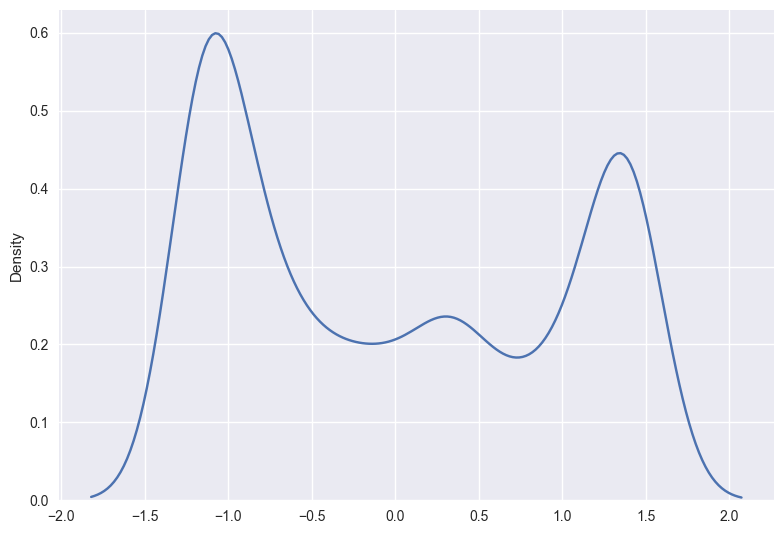

In [47]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
trans = pt.fit_transform(df_ongoing[name].to_numpy().reshape(-1, 1))
plt.figure()
sns.kdeplot(trans.flatten())
plt.tight_layout()
# plt.savefig('6- no_warning_sign_yehojohnson' , dpi=200)
plt.show()

## BoxCox

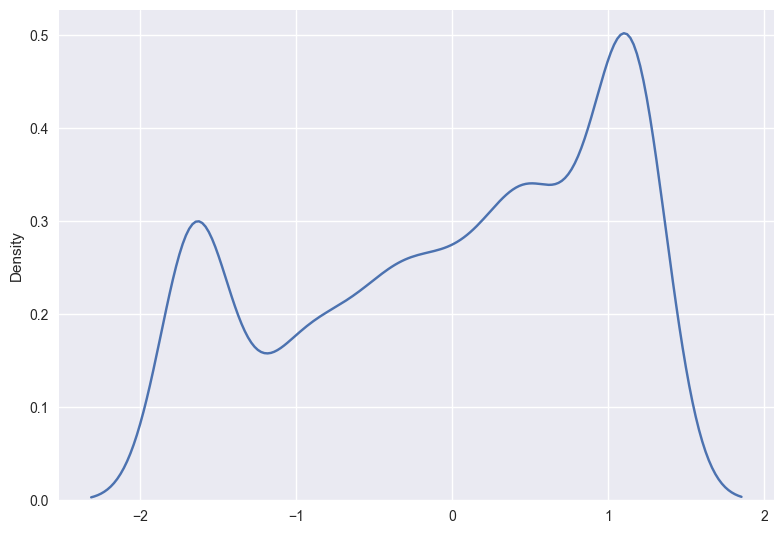

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method= 'box-cox')
trans = pt.fit_transform((df_ongoing[name]+0.0001).to_numpy().reshape(-1, 1))
plt.figure()
sns.kdeplot(trans.flatten())
plt.tight_layout()
# plt.savefig('7- no_warning_sign_boxcox' , dpi=200)
plt.show()

## min max 

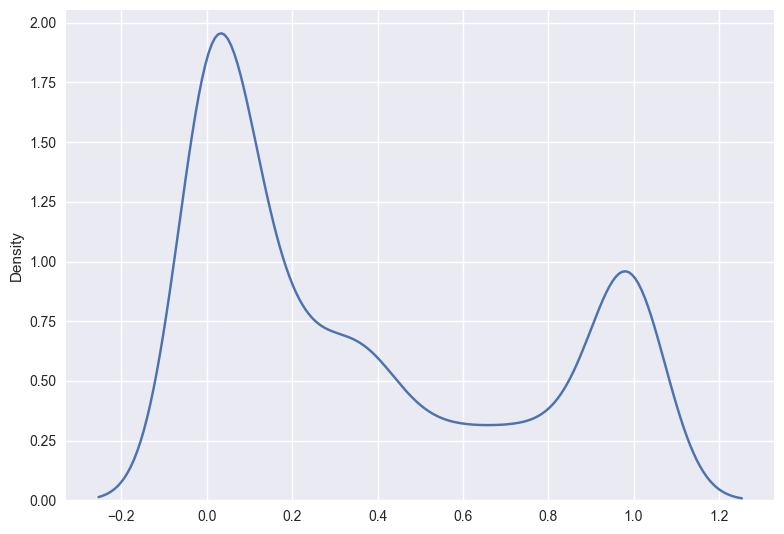

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
trans = scaler.fit_transform(df_ongoing[name].to_numpy().reshape(-1,1))
plt.figure()
sns.kdeplot(trans.flatten())
plt.tight_layout()
# plt.savefig('8- no_warning_sign_minmax' , dpi=200)
plt.show()

## Normalize

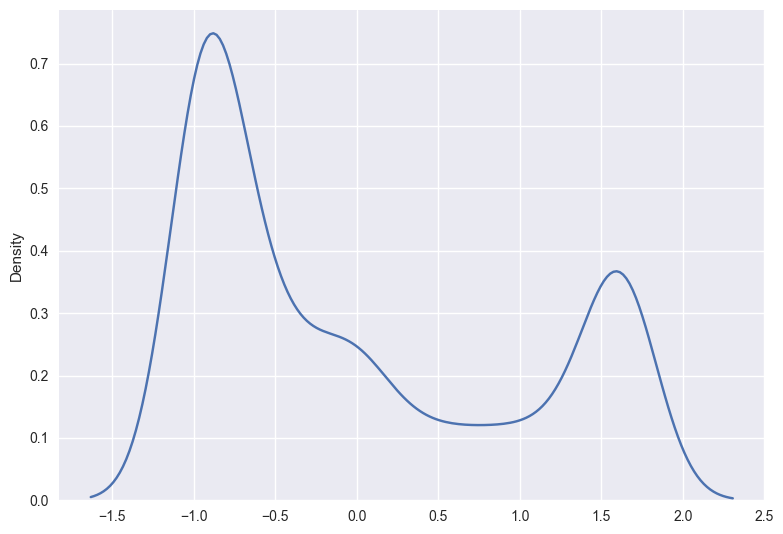

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
trans = scaler.fit_transform(df_ongoing[name].to_numpy().reshape(-1,1))
plt.figure()
sns.kdeplot(trans.flatten())
plt.tight_layout()
# plt.savefig('9- no_warning_sign_standard' , dpi=200)
plt.show()

# Output

In [51]:
df_ongoing.to_csv('final_train.csv')